## י 🔥 מבוא ל-$XGBoost$ י  

י $XGBoost$ (קיצור ל-$Extreme\ Gradient\ Boosting$) הוא מנגנון המבוסס על רעיון ה-$Gradient\ Boosted\ Trees$. האלגוריתם פותח במטרה לשפר את הדיוק ואת הביצועים (במונחים של זמן ריצה, שימוש בזיכרון ומקביליות) של אלגוריתמי $boosting$ קלאסיים. י  

## י למה $XGBoost$ נחשב “טוב במיוחד”? י  
1. י יעילות ($Efficiency$): האלגוריתם מממש אופטימיזציות בספרייה ברמה נמוכה ($C++$), ובכך רץ מהר מאוד על כמויות נתונים גדולות. י  
2. י $Parallelization$: מאפשר לנצל ליבות מעבד מרובות ($CPU$) וגם ריצות מבוזרות ($Distributed$). י  
3. י קונפיגורציות רגולריזציה חזקות: מונעות $Overfitting$ (רגולריזציה מסוג $L1$ ו-$L2$). י  
4. י עבודה עם נתונים חסרים ($Missing\ Values$): אלגוריתם פנימי שיודע למצוא את הדרך הטובה ביותר לטפל בערכים חסרים תוך כדי בניית העץ. י  
5. י תמיכה ב-$Column\ Subsampling$: בדומה ל-$Random\ Forest$, ניתן לבחור תת-קבוצה של תכונות ($Features$) לכל עץ כדי להפחית מתאם ($Correlation$) בין העצים ולשפר הכללה ($Generalization$). י  

⸻

## ☄️ י היסודות המתמטיים שעליהם נשען $XGBoost$ י  

1. י $Boosting$ – תהליך שבו מודלים “חלשים” מתחברים בהדרגה למודל חזק. י  
2. י $Gradient\ Descent$ – שימוש בנגזרות ($Gradient$ ו-$Hessian$). י  
3. י $Regularized\ Objective\ Function$ – פונקציית מטרה עם רגולריזציה. י  

⸻

## י שלב 1: מהו Boosting? י  
- י הגדרה כללית: סדרה של “מודלים חלשים” (למשל, עצים קטנים). י  
- י מודל חלש ($Weak\ Learner$): עץ החלטה רדוד. י  

⸻

## י שלב 2: $Gradient\ Descent$: אופטימיזציה מבוססת שיפועי גרדיאנט י  
- י חישוב נגזרת פונקציית האובדן ($Loss$) ביחס לתחזית הנוכחית. י  
- י העץ הבא “מותאם” כך שיחזה את הגרדיאנט הזה. י  

⸻

## י שלב 3: פונקציית מטרה רגולרית ($Regularized\ Objective\ Function$) י  

$$
\text{Obj}(\Theta) = \sum_{i=1}^{n} l\bigl(y_i, \hat{y}_i\bigr) + \sum_{k=1}^{K} \Omega(f_k)
$$  

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$$  

⸻

## ✨ י תהליך העבודה המלא של $XGBoost$ (שלב אחר שלב) י  

### י שלב 1: ייצוג המודל י  
$$
\hat{y}_i^{(K)} = \sum_{t=1}^{K} f_t(x_i)
$$  

### י שלב 2: בניית עץ ע"י מינימום פונקציית מטרה י  
$$
\text{Obj}^{(t)} = \sum_{i=1}^{n} l\Bigl(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)\Bigr) + \Omega\bigl(f_t\bigr)
$$  

### י שלב 3: הרחבת טיילור מסדר שני י  
$$
l\Bigl(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)\Bigr)
\approx l\Bigl(y_i, \hat{y}_i^{(t-1)}\Bigr)
+ g_i f_t(x_i)
+ \frac{1}{2} h_i \bigl(f_t(x_i)\bigr)^2
$$  

⸻

### י שלב 4: מציאת הפיצולים הטובים ביותר בעץ י  
$$
\text{Gain} = \frac{1}{2} \left[
\frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda}
- \frac{(G_L + G_R)^2}{H_L + H_R + \lambda}
\right] - \gamma
$$  

⸻

### י שלב 5: קביעת הערכים בעלים י  
$$
w_j = - \frac{\sum_{i \in \text{leaf } j} g_i}{\sum_{i \in \text{leaf } j} h_i + \lambda}
$$  

⸻

## ⚡ י דוגמה ידנית לתהליך $XGBoost$ י  

| $X$ | $Y$ |  
|-----|-----|  
| $1$ | $2$ |  
| $2$ | $4$ |  
| $3$ | $6$ |  

ניבוי ראשוני:  
$$
\hat{y}^{(0)} = \frac{2 + 4 + 6}{3} = 4
$$  

⸻

## 🌳 י יתרונות הליבה של $XGBoost$ י  
1. י $Regularization$ ($L1$, $L2$). י  
2. י $Handling\ Missing\ Values$. י  
3. י $Tree\ Pruning$. י  
4. י $Column\ Subsampling$. י  
5. י $Parallel\ Processing$. י  

⸻

## 🧮 י הסברים מתקדמים (מתמטי) י  

### י הרחבת טיילור (Taylor Expansion) מסדר שני י  
$$
f(x + \Delta x) \approx f(x) + f'(x)\,\Delta x + \frac{1}{2} f''(x)(\Delta x)^2
$$  

⸻

## ✅ י סיכום י  
1. י $Boosting + Gradient\ Descent$. י  
2. י $Objective\ Function$ עם רגולריזציה. י  
3. י בניית עצים לפי $Taylor\ Expansion$. י  
4. י חישוב $Gain$ ובחירת פיצולים. י  
5. י יעילות ויישומים נפוצים. י



⸻

## י $q(x)$ ופונקציית השייכות לעלים י  
- י $q(x)$: פונקציית שייכות ($Assignment\ Function$) שממפה דגימה $x$ לעלה מספר $j$. י  
- י הגדרה בסיסית: $q$ היא פונקציה המקבלת כקלט את וקטור התכונות $x$ (לדוגמה, $(x_1, x_2, \dots, x_d)$) ומחזירה אינדקס של עלה ($Leaf$) בעץ. י  
- י אם לעץ יש $T$ עלים, אז $q(x)$ מחזיר מספר שלם בטווח $[1, \dots, T]$. לדוגמה, אם $q(x) = 3$, פירושו ש-$x$ ממוינה לעלה מספר $3$ בעץ. י  
- י הקשר ל-$f_t(x) = w_{q(x)}$: י  
  - י בעץ החלטה רגיל, כל עלה מגדיר ערך ניבוי ($Weight$). י  
  - י $f_t(x)$ – שהיא העץ בזמן הסבב $t$ – שווה למשקל המתאים לעלה שאליו $x$ משתייכת, כלומר $w_{q(x)}$. י  
  - י $w_j$ הוא משקל העלה ה-$j$. י  
  - י לכן $f_t(x) = w_{q(x)}$ היא הדרך המתמטית להגיד שהחיזוי תלוי באיזה עלה נופלת הדגימה $x$. י  

⸻

## י למה צריך פונקציה כמו $q$? י  
1. י ייצוג קומפקטי של העץ. י  
2. י הפרדה בין “מבנה העץ” למשקלי העלים. י  
   - י מבנה העץ = אוסף הפיצולים שמגדירים את $q(x)$. י  
   - י משקלי העלים = $\{w_1, \dots, w_T\}$. י  
3. י ניתן להטמיע רגולריזציה על $\|w\|$. י  

⸻

## י איך $q(x)$ עובד בפועל? י  
י בעץ קלאסי, $q(x)$ מוגדר ע”י מסלול פיצול חד-משמעי: י  
1. י מתחילים בשורש העץ ($Root$). י  
2. י בודקים תנאי פיצול. י  
3. י ממשיכים בהסתעפות עד שמגיעים לעלה סופי ($Leaf$). י  
4. י אינדקס העלה שאליו מגיעים הוא התוצאה $q(x)$. י  

⸻

## י האם $q(x)$ רציף? (רקע תיאורטי) י  
- י לא, $q(x)$ היא פונקציה בדידה ($Discrete$). י  
- י שינוי קטן ב-$x$ עשוי להעביר את הדגימה מעל סף פיצול לעלה אחר. י  
- י לכן $XGBoost$ משתמש ב"הרחבת טיילור" על הערך הסופי $f_t(x) = w_{q(x)}$. י  

⸻

## י דוגמה קטנה ומוחשית י  
י נניח שיש לנו עץ עם $3$ פיצולים ו-$4$ עלים בסוף: י  
- י עלה $1$: $q(x) = 1$ אם $x_1 \le 10$ ו-$x_2 \le 5$. י  
- י עלה $2$: $q(x) = 2$ אם $x_1 \le 10$ ו-$x_2 > 5$. י  
- י עלה $3$: $q(x) = 3$ אם $x_1 > 10$ ו-$x_2 \le 7$. י  
- י עלה $4$: $q(x) = 4$ אם $x_1 > 10$ ו-$x_2 > 7$. י  


# ✅ י היפר-פרמטרים מרכזיים של $XGBoost$ י  

---

## י $1.$ $n\_estimators$ / $num\_boost\_round$ י  
- **י מה זה? י** י מספר העצים (או סבבי $Boosting$) שהאלגוריתם מאמן. י  
- **י משמעות בפועל: י**  
  - י בכל סבב, נבנה עץ נוסף ($Weak Learner$) שמוסיף תיקון לשגיאות הקיימות. י  
  - י ככל שנגדיל את מספר הסבבים, המודל עשוי להשתפר עד גבול מסוים – אבל עלול להוביל ל-$Overfitting$ אם אין מספיק רגולריזציה. י  
- **י דוגמה: י** $n_estimators = 100$ ⇒ י נבנים עד $100$ עצים, אלא אם נעצרים ב-$Early Stopping$. י  

---

## י $2.$ $learning\_rate$ (או $eta$) י  
- **י מה זה? י** י קצב הלמידה שמקטין את תרומתו של כל עץ חדש לחיזוי הסופי. י  
- **י איך זה עובד? י**  
  - י העדכון נעשה כך: $f_t(x_i) \times eta$ במקום $f\_t(x\_i)$. י  
- **י ערכים נפוצים: י** $0.01–0.3$  
- **י השפעה על ביצועים: י**  
  - י ערך נמוך ⇒ מודל לומד לאט → יותר עצים → פחות $Overfitting$. י  
  - י ערך גבוה ⇒ למידה מהירה → סכנה ל-$Overfitting$. י  
- **י דוגמה: י** אם $eta = 0.1$ ותיקון העץ הוא $+2$, אז בפועל נעדכן ב-$+0.2$. י  

---

## י $3.$ $max\_depth$ י  
- **י מה זה? י** י עומק מרבי לכל עץ החלטה. י  
- **י השפעה: י**  
  - י עומק גדול ⇒ עצים מורכבים ⇒ סכנת $Overfitting$. י  
  - י עומק קטן ⇒ פספוס דפוסים מורכבים. י  
- **י דוגמה: י** $max\_depth = 3$ ⇒ י עצים רדודים; אם יש דאטה מורכב, ייתכן ונבחר $max\_depth = 6$ או $10$. י  

---

## י $4.$ $min\_child\_weight$ י  
- **י מה זה? י** י סכום ה-$Hessian$ שעל עלה להכיל לפני שמתפצלים עוד. י  
- **י משמעות: י** י בקרה על הפיצול → נמנע פיצולים בעלי מידע דל. י  
- **י השפעה: י**  
  - י ערך גבוה ⇒ פיצולים רק כשיש גרדיאנט משמעותי. י  
  - י ערך נמוך ⇒ פיצולים בקלות ⇒ סכנת $Overfitting$. י  
- **י דוגמה: י** $min\_child\_weight = 10$ ⇒ י כל עלה חייב להכיל לפחות $10$ מבחינת $Hessian$ לפני פיצול. י  

---

## י $5.$ $gamma$ (או $min\_split\_loss$) י  
- **י מה זה? י** י קובע את סף ה-$Gain$ המינימלי להצדקת פיצול. י  
- **י השפעה: י**  
  - י ערך גבוה ⇒ האלגוריתם "בררן" בפיצולים. י  
  - י ערך נמוך ⇒ עץ עשוי להתפצל יותר. י  
- **י דוגמה: י** $gamma = 1$ ⇒ י נדרוש ש-$Gain$ יהיה לפחות $1$ כדי לפצל. י  

---

## י $6.$ $subsample$ י  
- **י מה זה? י** י אחוז הדגימות הנבחרות באקראי בכל סבב אימון. י  
- **י השפעה: י**  
  - י ערך $< 1.0$ ⇒ שימוש בתת-דגימה ⇒ הפחתת קורלציה בין עצים ⇒ הפחתת $Overfitting$. י  
- **י דוגמה: י** $subsample = 0.8$ ⇒ י בכל סבב ניקח $80\%$ מהנתונים לאימון. י  

---

## י $7.$ $colsample\_bytree$ / $colsample\_bylevel$ / $colsample\_bynode$ י  
- **י מה זה? י** י אחוז תכונות בשימוש בכל שלב: י  
  - $colsample\_bytree$: י בבניית עץ שלם. י  
  - $colsample\_bylevel$: י בכל רמה. י  
  - $colsample\_bynode$: י בכל פיצול. י  
- **י דוגמה: י** $colsample\_bytree = 0.5$ ⇒ י בכל עץ ישמשו $50\%$ מהעמודות. י  

---

## י $8.$ רגולריזציה - $lambda$ $(\lambda)$ ו-$alpha$ $(\alpha)$ י  
- **י $lambda$ $(\lambda)$: י** י רגולריזציית $L2$ (ממתנת קיצוניות של משקלי עלים). י  
- **י $alpha$ $(\alpha)$: י** י רגולריזציית $L1$ (מאפס משקלים נמוכים → פחות עלים פעילים). י  
- **י דוגמה: י**  
  - $lambda = 10$ ⇒ י עלים יקבלו ערכים קטנים יותר. י  
  - $alpha = 5$ ⇒ י כל עלה שמשקלו קטן מ-$5$ יאופס. י  

---

## י $9.$ $tree\_method$ י  
- **י אפשרויות: י**  
  - $exact$: י חיפוש מדויק → דאטה קטן. י  
  - $approx$ / $hist$: י אלגוריתם מבוסס היסטוגרמות → דאטה גדול. י  
  - $gpu_hist$: י שימוש ב-$GPU$ להאצה משמעותית. י  
- **י דוגמה: י** י דאטה של $10$ מיליון רשומות ⇒ $gpu\_hist$ או $hist$ עדיפים. י  

---

## י $10.$ $objective$ י  
- **י מה זה? י** י סוג פונקציית האובדן: י  
  - $reg:squarederror$: י רגרסיה. י  
  - $binary:logistic$: י סיווג בינארי. י  
  - $multi:softmax$: י סיווג רב-קטגורי. י  
- **י דוגמה: י** י סיווג דוא"ל ספאם ⇒ $binary:logistic$. י  

---

## י $11.$ $scale\_pos\_weight$ י  
- **י מה זה? י** י משקל לתיקון חוסר איזון בין מחלקות. י  
- **י השפעה: י** י על בעיות סיווג לא מאוזנות. י  
- **י דוגמה: י** י מחלה נדירה ($1\%$) ⇒ $scale\_pos\_weight = 99$ ייאזן משקל המחלקות. י  

---

## י $12.$ $early\_stopping\_rounds$ י  
- **י מה זה? י** י עצירה אוטומטית של אימון אם אין שיפור בולידציה במשך $N$ סבבים. י  
- **י דוגמה: י** $early\_stopping\_rounds = 10$ ⇒ י אין שיפור ב-$10$ סבבים רצופים ⇒ עצירה. י  

---

# ⚙️ י כיוונון $Tuning$ היפר$-$פרמטרים י  
1. **י התחלה בערכים שמרניים: י**  
   - $max_depth$: י בינוני ($5$-$8$) י  
   - $learning_rate$: י $0.05–0.2$ י  
   - $subsample$: י $0.8$ י  
2. **י $Grid Search$ / $Random Search$ / $Bayesian Optimization$ י**  
3. **י $Early Stopping$ לצמצום $Overfitting$. י**  
4. **י רגולריזציה $\lambda$ / $\alpha$ למודל כללי טוב יותר. י**  

---

# ✅ י סיכום י  
- י היפר$-$פרמטרים שולטים במורכבות וביכולת הכללה של $XGBoost$. י  
- י איזון רגולריזציה $(\lambda, \alpha)$, עומק, וקצב הלמידה → קריטי להצלחה. י  
- י טיוב קפדני מונע $Overfitting$ ושיפור הכללה על דאטה חדש. י  


# טבלה מרוכזת של סימונים נפוצים

| **י $סימון$ י  | **י $הגדרה / משמעות$ י  |
|--------------------------------|------------------------------------------------------------------------------------------------------------------------------|
| י $(x_i, y_i)$ י  | י דגימה מס' $i$ בסט האימון: $x_i \in \mathbb{R}^p$ ו- $y_i$ היא התוצאה ($רגרסיה$ או $סיווג$). י  |
| י $n$ י  | י מספר הדוגמאות בסט האימון ($Training Samples$). י  |
| י $p$ י  | י מספר התכונות ($Features$) בכל דגימה $x_i$. י  |
| י $K$  או  $T_{trees}$ י  | י מספר העצים הסופי (או מספר סבבי $Boosting$) במודל $XGBoost$. י  |
| י $\hat{y}_i^{(t)}$ י  | י הערך החזוי עבור דגימה $i$ לאחר הוספת העץ ה-$t$. י  |
| י $f_t(x)$ י  | י העץ ה-$t$: פונקציה הממפה $x$ לערך ניבוי (בדרך כלל ערך של עלה). י  |
| י $\eta$ (eta) י  | י קצב הלמידה ($Learning Rate$): מקדם כיווץ שמקטין את תרומת כל עץ חדש. י  |
| י $\Omega(f)$ י  | י איבר הרגולריזציה של העץ $f$ (כולל קנס על מספר העלים ועל משקליהם). י  |
| י $\gamma$ י  | י $Tree Complexity Penalty$: קנס קבוע על הוספת עלים חדשים (משפיע על ה-$Gain$ המינימלי הדרוש לפיצול). י  |
| י $\lambda$ י  | י פרמטר רגולריזציית $L2$ על משקולות העלים (ממתן ערכים גדולים). י  |
| י $\alpha$ י  | י פרמטר רגולריזציית $L1$ על משקולות העלים (בגודל מוחלט), עשוי לאפס משקולות קטנות → פחות עלים פעילים. י  |
| י $T$ י  | י מספר העלים בעץ יחיד ($Leaf Count$) — לא מספר העצים! י  |
| י $w_j$ י  | י משקל העלה ה-$j$ בעץ ($Leaf Weight$). י  |
| י $q(x)$ י  | י פונקציית השייכות לעלה: ממפה את $x$ לאינדקס עלה ספציפי ב-${1,...,T}$. י  |
| י $\hat{y}_i^{(0)}$ י  | י $Base Score$ או $Initial Prediction$: התחזית ההתחלתית (ממוצע ברגרסיה או $log-odds$ בסיווג בינארי). י  |
| י $l(y_i, \hat{y}_i)$ י  | י פונקציית האובדן ($Loss Function$): למשל $MSE$, $Log Loss$ וכו’. י  |
| י $g_i, h_i$ י  | י $Gradient$ ו-$Hessian$ של פונקציית האובדן, מחושבים עבור הדגימה $i$ ביחס לתחזית הנוכחית. י  |
| י $\sum_{i \in L_j} g_i, h_i$ י  | י סכומי הגרדיאנטים וההסקות השניות בכל עלה $j$ (סך הדגימות בעלה). י  |
| י $G_L, H_L, G_R, H_R$ י  | י סכומי הגרדיאנטים וההסקות בפיצול $Left/Right$: הצד השמאלי והימני של הפיצול. י  |
| י $\text{Gain}$ י  | י רווח נטו מפיצול: מדד השיפור בפונקציית המטרה בעקבות הפיצול. י  |
| י $\text{Obj}(\Theta)$ י  | י פונקציית המטרה הכוללת ($Objective Function$): סכום האובדן + רגולריזציה. י  |
| י $\partial, \partial^2$ י  | י סימונים לנגזרת ראשונה ($Gradient$) ושנייה ($Hessian$) של פונקציית האובדן. י  |


⸻

# 1) מימוש חינוכי של $XGBoost$ שלב-אחר-שלב

### ייבוא ספריות וטעינת נתונים


In [3]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import math

# נטען את סט הנתונים California Housing
data = fetch_california_housing()
X = data.data
y = data.target

# לצורכי הדגמה ניקח subset קטן יותר ונעשה חלוקה ל-train/test
# (בדרך כלל תיקח את כל הנתונים, אבל כאן - דוגמא קטנה)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# כדי להקל על הקריאה, נהפוך את X_train ל-DataFrame
feature_names = data.feature_names
df_train = pd.DataFrame(X_train, columns=feature_names)
df_test  = pd.DataFrame(X_test,  columns=feature_names)

print("Shape Train:", df_train.shape, " Shape Test:", df_test.shape)



Shape Train: (16512, 8)  Shape Test: (4128, 8)



## שלב 1: ייצוג המודל

### נניח שהמודל שלנו הוא סכום של $K$ עצים. לצורך פשטות, נדגים עץ אחד או שניים.


In [4]:

# הגדרת פרמטרים בסיסיים
K = 2  # מספר עצים (סבבים) שנבנה בהדגמה
eta = 0.3  # learning rate

# ניבוי ראשוני (Base score): ממוצע של y_train
base_score = np.mean(y_train)

# נתחיל את החיזוי הקיים - וקטור בגודל n_train
y_pred_current = np.full_like(y_train, base_score, dtype=float)

print("Base score (ממוצע התוויות ב-Train):", base_score)
print("דוגמה ל-5 ניבויי פתיחה:", y_pred_current[:5])

Base score (ממוצע התוויות ב-Train): 2.071946937378876
דוגמה ל-5 ניבויי פתיחה: [2.07194694 2.07194694 2.07194694 2.07194694 2.07194694]




### כעת $\hat{y}^{(0)} = base\_score$. בכל סבב, נעדכן לפי $\hat{y}^{(t)} = \hat{y}^{(t-1)} + \eta \cdot f_t(x)$ י.  

⸻

## שלב 2: בניית עץ על ידי מינימום פונקציית מטרה (עם $Gradient/Hessian$)

### נגדיר פונקציית אובדן פשוטה: $MSE$.  
•	הנגזרת הראשונה ( $Gradient$ ) עבור הדגימה $i$ היא $\hat{y}_i - y_i$ .י  
•	הנגזרת השנייה ($Hessian$) כאן קבועה = 1 (כי $\partial^2 \frac{1}{2}(y - \hat{y})^2 = 1$ ) . י  

### חישוב גרדיאנטים והסֵקוֹת ($Hessian$)


In [5]:

def mse_gradient(pred, true):
    """
    מחזיר את הגרדיאנט של MSE ביחס ל-hat{y}:
    g_i = (hat{y}_i - y_i)
    """
    return (pred - true)

def mse_hessian(pred, true):
    """
    הנגזרת השניה עבור MSE קבועה = 1 לכל דגימה
    """
    return np.ones_like(pred)

def compute_gradients_hessians(y_true, y_pred):
    g = mse_gradient(y_pred, y_true)
    h = mse_hessian(y_pred, y_true)
    return g, h

# שלב הדגמה: נחשב גרדיאנטים והסֵקוֹת לשלב הראשון
g, h = compute_gradients_hessians(y_train, y_pred_current)
print("Gradient shape:", g.shape, " Hessian shape:", h.shape)
print("Gradient sample:", g[:10])


Gradient shape: (16512,)  Hessian shape: (16512,)
Gradient sample: [ 1.04194694 -1.74905306  0.34594694  1.13794694  1.10694694 -0.57605306
  0.49894694 -2.92806306  0.67394694 -1.08405306]



⸻

## שלב 3: מציאת הפיצולים הטובים ביותר בעץ

### לצורך פשטות, נדגים בניית עץ אחד בלבד עם פיצול בודד (או מספר פיצולים קטן מאוד).  
### ב-$XGBoost$, נבצע חיפוש על כל התכונות וכל ערכי החיתוך, ונחשב את ה־$Gain$. כאן נעשה דוגמה סופר-בסיסית:


In [6]:


def find_best_split(X, g, h, lambda_, gamma):
    """
    מוצא את הפיצול הטוב ביותר על בסיס נוסחת Gain פשוטה:
    Gain = 1/2 [ G_L^2/(H_L + lambda) + G_R^2/(H_R + lambda) - G^2/(H + lambda ) ] - gamma
    נחזור עם (best_feature, best_threshold, best_gain).
    
    X: DataFrame (או Numpy)
    g, h: וקטורי גרדיאנט והסקה
    lambda_: פרמטר רגולריזציה L2
    gamma: פרמטר ענישה על פיצול
    """
    
    best_gain = -float("inf")
    best_feat = None
    best_thresh = None
    
    # סכומי g ו-h על כל המדגם
    G_total = np.sum(g)
    H_total = np.sum(h)

    # נבדוק כל עמודה וכל ערך אפשרי (ניקח דגימה קטנה של ספים כדי לקצר)
    for col in X.columns:
        values = np.unique(X[col])
        # נוכל להקטין: לקחת רק 50 ספים רנדומליים, לדוגמה, אך כאן ניקח את כולם (בזהירות בנתונים גדולים!)
        for val in values:
            left_mask  = (X[col] <= val)
            right_mask = (X[col] >  val)
            
            G_L = np.sum(g[left_mask])
            H_L = np.sum(h[left_mask])
            G_R = G_total - G_L
            H_R = H_total - H_L
            
            # חישוב Gain
            gain = 0.5 * (
                (G_L**2)/(H_L + lambda_) + (G_R**2)/(H_R + lambda_) - (G_total**2)/(H_total + lambda_)
            ) - gamma
            
            if gain > best_gain:
                best_gain = gain
                best_feat = col
                best_thresh = val
    
    return best_feat, best_thresh, best_gain

# פרמטרים בסיסיים לדוגמה
lambda_ = 1.0
gamma = 0.0

best_feature, best_threshold, best_gain = find_best_split(df_train, g, h, lambda_, gamma)
print("הפיצול הטוב ביותר (פיצול יחיד) נמצא בעמודה:", best_feature)
print("סף החיתוך (threshold):", best_threshold)
print("Gain שהתקבל:", best_gain)


הפיצול הטוב ביותר (פיצול יחיד) נמצא בעמודה: MedInc
סף החיתוך (threshold): 5.0864
Gain שהתקבל: 3497.6458391487517



### 	בפועל, $XGBoost$ משתמש בטכניקות יעילות יותר ($Histogram-based$, וכו’). זהו רק מימוש נאיבי לצורך המחשה.

⸻

## שלב 4: קביעת ערכי העלים (משקל לכל עלה)

## נניח שאנו יוצרים עץ של 2 עלים ($Left, Right$) לפי הפיצול הטוב שמצאנו. על פי נוסחת $XGBoost$ הפשוטה:
$$
w_{\text{leaf}} = -\frac{\sum g_i}{\sum h_i + \lambda}.
$$

In [7]:


def compute_leaf_weight(g, h, lambda_):
    """
    מחשב את w = - G / (H + lambda) עבור עלה.
    """
    G = np.sum(g)
    H = np.sum(h)
    return - G / (H + lambda_)

# נבצע את הפיצול בפועל
left_mask  = (df_train[best_feature] <= best_threshold)
right_mask = ~left_mask  # או (df_train[best_feature] > best_threshold)

# נחשב את משקל העלה השמאלי
w_left = compute_leaf_weight(g[left_mask], h[left_mask], lambda_)
# נחשב את משקל העלה הימני
w_right = compute_leaf_weight(g[right_mask], h[right_mask], lambda_)

print("Leaf weight (Left):", w_left)
print("Leaf weight (Right):", w_right)


Leaf weight (Left): -0.3321333511372808
Leaf weight (Right): 1.2753842809497815



⸻

עדכון החיזוי

נזכור שהעץ הנוכחי, נסמנו אותו כ-$f_1$. עבור כל דגימה $x_i$: י  
$$
f_1(x_i) = \begin{cases}
w_{\text{left}}, & x_i \text{ לאמשב} \\
w_{\text{right}}, & x_i \text{ ןימיב}
\end{cases}
$$
ב-$XGBoost$, לרוב יש $Learning Rate$ $\eta$ שמקטין את תרומת העץ:

$\hat{y}_i^{(1)} = \hat{y}_i^{(0)}$ + $\eta$ $\cdot$ $f_1(x_i)$.י  


In [8]:

# נבנה את הפונקציה שמחזירה את ערכי העץ החדש
def single_tree_prediction(X, feature, threshold, w_left, w_right):
    """
    מחזיר וקטור של תחזיות עבור כל x_i לפי פיצול feature<=threshold
    """
    mask = (X[feature] <= threshold)
    y_tree = np.zeros(X.shape[0], dtype=float)
    y_tree[mask] = w_left
    y_tree[~mask] = w_right
    return y_tree

# ניצור את וקטור התחזיות של העץ
tree_1_pred = single_tree_prediction(df_train, best_feature, best_threshold, w_left, w_right)

# נעדכן את y_pred_current
y_pred_current = y_pred_current + eta * tree_1_pred

print("דוגמה ל-5 ניבויים חדשים לאחר העץ הראשון:")
print(y_pred_current[:5])


דוגמה ל-5 ניבויים חדשים לאחר העץ הראשון:
[1.97230693 1.97230693 1.97230693 1.97230693 1.97230693]



	זה משלים בנייה של עץ אחד בשלב הראשון ($t=1$). כדי להמשיך לעץ נוסף ($t=2$), נחזור לחישוב גרדיאנטים/הסקות מול הניבוי החדש ו”נבנה” פיצולים נוספים — בדיוק באותה צורה.

⸻

שלב 5: סיכום ציון העץ ($Gain$ סופי + רגולריזציה)

נוכל לחשב את ה־$Objective$ הכולל שהשתפר בעקבות העץ, אם נרצה. לדוגמה, פונקציית המטרה כאן היא:
$$
\text{Obj}^{(t)} = \sum_{i=1}^n \text{MSE}(y_i, \hat{y}i^{(t)}) + \sum{trees} \Omega(f)
$$
כאשר
$$
\Omega(f) \approx \gamma \times \#leaves + \frac{1}{2}\lambda\sum_j w_j^2.
$$


In [9]:

def mse_loss(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred)**2)

def regularization_term(w_left, w_right, lambda_, gamma):
    # סכום ריבועי המשקולות + gamma * T (מספר עלים)
    return 0.5*lambda_*(w_left**2 + w_right**2) + gamma*2  # יש לנו 2 עלים

train_mse = mse_loss(y_train, y_pred_current)
reg = regularization_term(w_left, w_right, lambda_, gamma)
objective_value = train_mse + reg

print("MSE אחרי העץ הראשון:", train_mse)
print("עלות רגולריזציה של העץ הראשון:", reg)
print("Objective Value משוער:", objective_value)


MSE אחרי העץ הראשון: 0.560353886705089
עלות רגולריזציה של העץ הראשון: 0.8684588135157357
Objective Value משוער: 1.4288127002208246



כך משלימים סבב $Boosting$ אחד. בייצור מלא, נעשה לולאה על $t=1$ עד $K$, בכל פעם נמציא עץ חדש ומוסיפים אותו.

⸻

הדגמה של עץ שני (אופציונלי)


In [10]:

# נבצע מהר עוד סבב (עץ שני) כדי להמחיש את הרעיון
g2, h2 = compute_gradients_hessians(y_train, y_pred_current)
best_feature_2, best_threshold_2, best_gain_2 = find_best_split(df_train, g2, h2, lambda_, gamma)
left_mask_2  = (df_train[best_feature_2] <= best_threshold_2)
right_mask_2 = ~left_mask_2
w_left_2  = compute_leaf_weight(g2[left_mask_2],  h2[left_mask_2],  lambda_)
w_right_2 = compute_leaf_weight(g2[right_mask_2], h2[right_mask_2], lambda_)

tree_2_pred = single_tree_prediction(df_train, best_feature_2, best_threshold_2, w_left_2, w_right_2)
y_pred_current = y_pred_current + eta * tree_2_pred

train_mse_2 = mse_loss(y_train, y_pred_current)
print("MSE אחרי העץ השני:", train_mse_2)

MSE אחרי העץ השני: 0.49623320450452996


Fitting 3 folds for each of 20 candidates, totalling 60 fits

=== Best Hyperparameters ===
{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.5, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

=== Final Model Performance ===
RMSE: 0.4477
MAE: 0.2932
R²: 0.8470


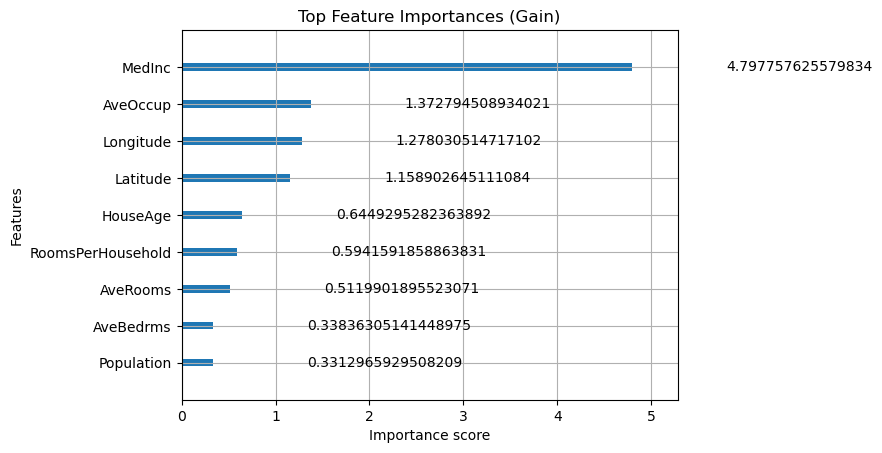

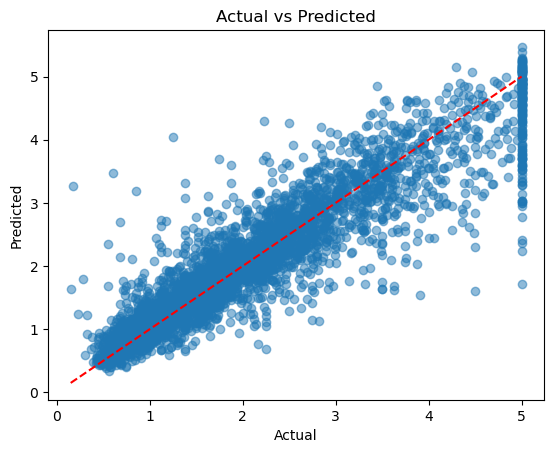

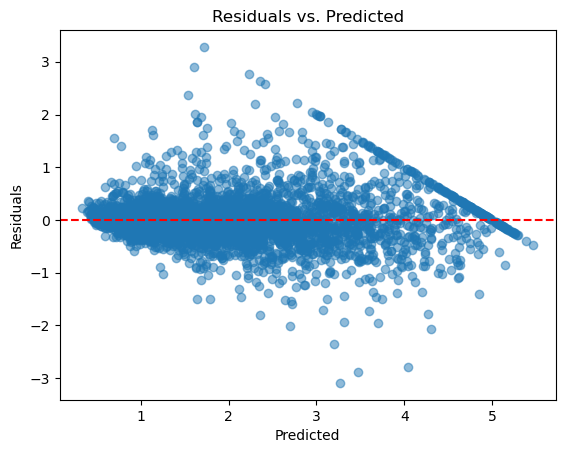

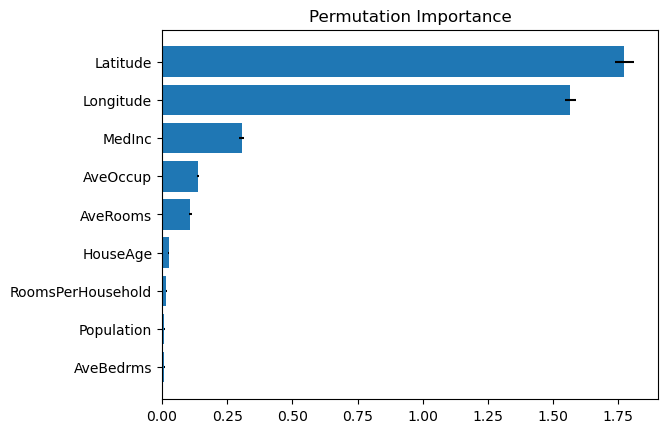

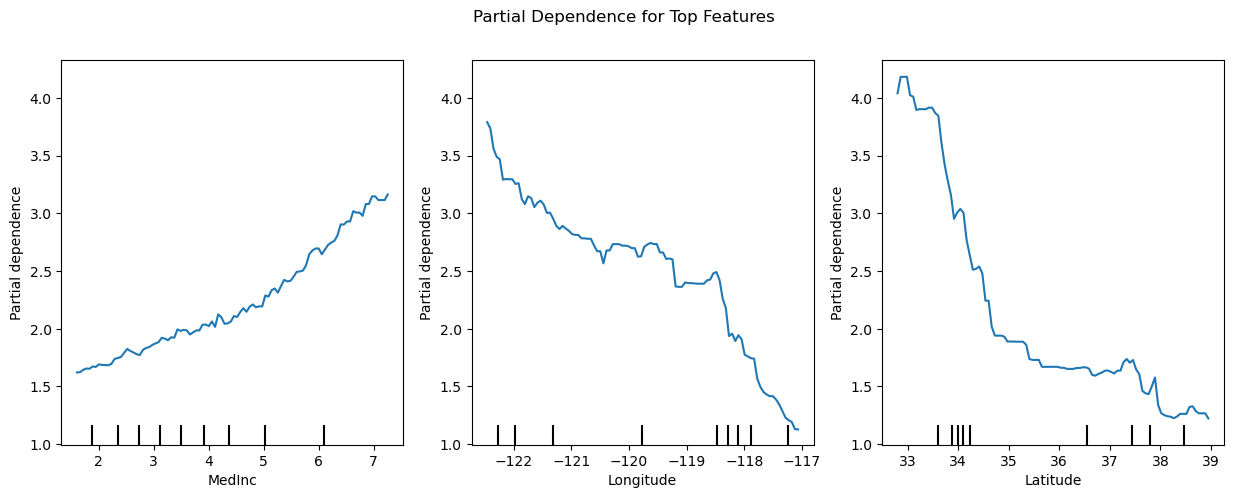

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# 1. טוענים את הדאטה
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# 2. פיצול ל־Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. מעט Feature Engineering (לדוגמה)
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()
X_train_fe["RoomsPerHousehold"] = X_train_fe["AveRooms"] / X_train_fe["HouseAge"].clip(lower=1)
X_test_fe["RoomsPerHousehold"] = X_test_fe["AveRooms"] / X_test_fe["HouseAge"].clip(lower=1)

# 4. הכנת רשת חיפוש היפר־פרמטרים (רנדומלי)
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', n_estimators=300, seed=42)

param_dist = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 3, 5]
}

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_fe, y_train)

best_params = random_search.best_params_
print("\n=== Best Hyperparameters ===")
print(best_params)

# 5. אימון המודל הסופי
#    כאן נסיר את הפרמטר early_stopping_rounds כי גרסת XGBoost שלך כנראה לא תומכת בו.
final_model = xgb.XGBRegressor(
    **best_params,
    n_estimators=1000,  # אפשר להאריך, אבל בלי early_stopping_rounds
    objective='reg:squarederror',
    eval_metric='rmse',
    seed=42
)

final_model.fit(X_train_fe, y_train)  # אין eval_set ואין early_stopping_rounds

# 6. חישוב וחיווי ביצועים
y_pred = final_model.predict(X_test_fe)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Final Model Performance ===")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 7. Visualizations וכו׳
# Feature Importance
plot_importance(final_model, importance_type='gain', max_num_features=10)
plt.title("Top Feature Importances (Gain)")
plt.show()

# Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Permutation Importance
result = permutation_importance(final_model, X_test_fe, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(X_test_fe.columns[sorted_idx], result.importances_mean[sorted_idx],
         xerr=result.importances_std[sorted_idx])
plt.title("Permutation Importance")
plt.show()

# Partial Dependence (עובד רק עם אסטימטור בסגנון סקיק־לרן)
top_features = [X_test_fe.columns[i] for i in sorted_idx[-3:]]  # 3 הכי חשובים
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
PartialDependenceDisplay.from_estimator(final_model, X_test_fe, top_features, ax=ax)
fig.suptitle("Partial Dependence for Top Features")
plt.show()

/Users/djourno/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 4000x2000 with 0 Axes>

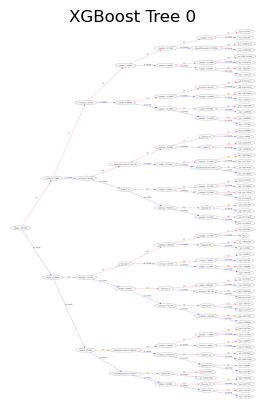

In [12]:
import xgboost as xgb
import matplotlib.pyplot as plt

# If you trained a model with the sklearn API, get the underlying booster:
booster = final_model.get_booster()  # This extracts the native XGBoost booster

# Plot the first tree (num_trees=0). Change rankdir if you prefer top-down vs left-right.
plt.figure(figsize=(40, 20))  # Adjust size to fit your screen
xgb.plot_tree(booster, num_trees=0, rankdir='LR')
plt.title("XGBoost Tree 0")
plt.show()

י להלן השוואה מקיפה בין $XGBoost$ לבין חמישה נושאים/מודלים שונים: י  
1. י $Dimensionality\ Reduction$ י  
2. י $Bootstrapping$ י  
3. י $Bagging$ י  
4. י $Random\ Forest$ י  
5. י $Boosting$ י  

י הסדר המוצג – מן השונה ביותר ועד הקרוב ביותר ל־$XGBoost$ – נובע מכמה רחוק או קרוב העיקרון האלגוריתמי של כל שיטה מהרעיון שעומד בבסיס $XGBoost$ (שהוא, במהותו, אלגוריתם $Gradient\ Boosting$ משוכלל). י  

---

## י $1)$ $Dimensionality\ Reduction$ י  

### א. י סיכום קצר של השיטה י  

י מה זה? י  
י “צמצום ממדים” מתייחס למשפחה של טכניקות שמטרתן לצמצם את מספר התכונות ($Features$) או הממדים בדאטה, תוך שמירה מרבית על המידע הרלוונטי. דוגמאות נפוצות: י  
- י $PCA$ ($Principal\ Component\ Analysis$): מציאת צירופים ליניאריים של מאפיינים שמסבירים את עיקר השונות בנתונים. י  
- י $t-SNE$ או $UMAP$: בעיקר לצורכי ויזואליזציה בממדים נמוכים. י  
- י $Autoencoders$ (ברשתות נוירונים): מפותחות גם הן לצמצום ממדים ולמידת ייצוגים דחוסים. י  

### ב. י מדוע המודל הזה טוב (יתרונותיו) י  
1. י התמודדות עם $Curse\ of\ Dimensionality$: כאשר מספר התכונות גבוה מאוד ביחס למספר הדוגמאות, ביצועי מודלי $ML$ עלולים להיפגע, ו-$Dimensionality\ Reduction$ יכול לעזור להבליט את המידע המשמעותי ביותר. י  
2. י פשטות חישובית: מודל שהריץ צמצום ממדים יכול להשתמש בפחות תכונות בפועל – חסכון בזמן ובזיכרון. י  
3. י הפחתת רעש: לעיתים הצמצום “מעלים” תכונות שהן בעיקר רעש, ובכך משפר את הכללת המודל. י  

### ג. י יתרונות של $XGBoost$ לעומת $Dimensionality\ Reduction$ י  
1. י מודל חיזוי מלא: $Dimensionality\ Reduction$ אינו “מודל חיזוי” בפני עצמו, אלא $Preprocessing$ או שלב עזר. $XGBoost$ כן מהווה אלגוריתם למידה מפוקח ($Supervised$) שמוציא תחזיות ישירות. י  
2. י מנגנון מובנה ל-$Feature\ Importance$: $XGBoost$ יכול בעצמו להפיק מדדי חשיבות לכל תכונה, ואף לבצע $Column\ Subsampling$ כדי להתמודד עם מספר תכונות גדול. י  
3. י יכולות הקבלה ($Scalability$): $XGBoost$ מותאם לדאטה גדול מאוד, ומספק אופטימיזציות לזמן ריצה. בעוד $Dimensionality\ Reduction$ עשוי לדרוש חישובים מורכבים (למשל $SVD$ מלא ב-$PCA$). י  

### ד. י דמיון ושוני מול $XGBoost$ י  
- י דמיון: שני הכלים יכולים להוות חלק מ-$Pipeline$ ב-$ML$, כשלעיתים מבצעים צמצום ממדים לפני אימון מודל (כולל $XGBoost$). י  
- י שוני: י  
  1. י מטרה: מטרת $Dimensionality\ Reduction$ היא להקטין את מרחב התכונות, בעוד $XGBoost$ הוא מודל חיזוי המבוסס על עצים. י  
  2. י סוג אלגוריתם: $Dimensionality\ Reduction$ אינו בהכרח מפיק $Predictive\ Model$; $XGBoost$ הוא מודל ניבוי לכל דבר ($Classification$, $Regression$ וכו’). י  
  3. י רגולריזציה מול צמצום ממדים: בעוד צמצום ממדים הוא אחת הדרכים להתמודד עם עודף פרמטרים, $XGBoost$ מתמודד עם מורכבות יתר באמצעות רגולריזציה על העצים, $Subsampling$, ועוד. י  

---

## י $2)$ $Bootstrapping$ י  

### א. י סיכום קצר של השיטה י  

י מה זה? י  
י $Bootstrapping$ היא טכניקת דגימה סטטיסטית. הרעיון הבסיסי: י  
- י לקחת דגימות חוזרות ($Sample\ with\ replacement$) מהסט המקורי, באותו גודל כמו הסט עצמו, אך עם חזרות אקראיות. י  
- י משמשת בין היתר לאמידת סטיית תקן של אומדנים, בניית רווחי סמך, או כבסיס לשיטות $Ensemble$ כמו $Bagging$. י  

### ב. י מדוע השיטה הזו טובה (יתרונותיה) י  
1. י אמידה סטטיסטית גמישה: מאפשרת להעריך פרמטרים כמו ממוצע או מדד סטטיסטי אחר כאשר ההנחות הקלאסיות לא בהכרח מתקיימות. י  
2. י בסיס לשיטות $Ensemble$: $Bootstrapping$ הוא היסוד ליצירת סטים שונים של אימון ולבניית מודלים עצמאיים שבסוף מקבלים $Vote$ או ממוצע. י  

### ג. י יתרונות של $XGBoost$ על פני $Bootstrapping$ י  
1. י $XGBoost$ כאלגוריתם שלם: $Bootstrapping$ בפני עצמו הוא תהליך דגימה, לא מודל למידה. $XGBoost$ הוא $Pipeline$ שלם משלב $Loss$, $Gradients$, בניית עצים ורגולריזציה. י  
2. י $Boosting$ במקום “רק דגימה”: בניגוד לשימוש ב-$Sampling$ כדי ליצור מודלים עצמאיים ואז למזג אותם, $Boosting$ פועל רספונסיבית לשגיאות המודל הנוכחי. י  

### ד. י דמיון ושוני מול $XGBoost$ י  
- י דמיון: שניהם יכולים להופיע בעולם ה-$Ensemble$. $XGBoost$ גם עושה $Subsampling$, אם כי לא תמיד בשיטת $With\ Replacement$. י  
- י שוני: י  
  1. י מטרה ושימוש: $Bootstrapping$ הוא כלי סטטיסטי למגוון מטרות; $XGBoost$ הוא מודל חיזוי מסוג $Gradient\ Boosted\ Trees$. י  
  2. י תהליך: $Bootstrapping$ לא מחייב עדכון הדרגתי לפי השגיאה. $XGBoost$ כן בנוי על תיקון שגיאות השלבים הקודמים. י  

---

## י $3)$ $Bagging$ י  

### א. י סיכום קצר של השיטה י  

י מה זה? י  
י $Bagging$ ($Bootstrap\ Aggregating$) הוא אלגוריתם $Ensemble$ שבו מאמנים כמה מודלים (נניח עצים), כל אחד על מדגם $Bootstrap$ עצמאי של הדאטה, ואז מאגדים ($Aggregating$) את תחזיותיהם על ידי ממוצע או הצבעה. י  

### ב. י מדוע המודל הזה טוב (יתרונותיו) י  
1. י הקטנת שונות ($Variance$): טעויות אקראיות של כל מודל מתקזזות בממוצע הסופי. י  
2. י פשטות: קל ליישם; אפשר לקחת כל אלגוריתם בסיסי ולבצע עליו $Bagging$. י  
3. י $Scalability$: ניתן לאמן מודלים בנפרד ולשלב תוצאות. י  

### ג. י יתרונות של $XGBoost$ על פני $Bagging$ י  
1. י למידה אדפטיבית: $XGBoost$ בונה עץ אחרי עץ, כשכל עץ מתרכז בשגיאות של הקודם ($Gradient\ Boosting$). י  
2. י רגולריזציה מתקדמת: $XGBoost$ כולל פרמטרים כמו $\gamma$, $\lambda$, ו-$\alpha$. י  
3. י ניהול תכונות חסרות: ל-$XGBoost$ יש מנגנון פנימי לטיפול בערכים חסרים. י  

---

## י $4)$ $Random\ Forest$ י  

### א. י סיכום קצר של השיטה י  
י מה זה? י  
י $Random\ Forest$ הוא שכלול של $Bagging$ עבור עצי החלטה, שבו לכל עץ נעשה גם $Feature\ Subsampling$ בנוסף לדגימת $Bootstrap$. י  

### ב. י מדוע המודל הזה טוב (יתרונותיו) י  
1. י $Variety$ גבוהה של עצים: מקטינים מתאם בין עצים. י  
2. י פשוט וכמעט תמיד עובד טוב. י  
3. י אמידת חשיבות תכונות ($Feature\ Importance$). י  

### ג. י יתרונות של $XGBoost$ על פני $Random\ Forest$ י  
1. י $Boosting$ במקום $Bagging$: $XGBoost$ בונה עצים ברצף ומתקן שגיאות. י  
2. י רגולריזציה מפורשת: $\gamma$, $\lambda$, $\alpha$. י  
3. י טיפול בערכים חסרים: אוטומטי ב-$XGBoost$. י  

---

## י $5)$ $Boosting$ י  

### א. י סיכום קצר של השיטה י  
י מה זה? י  
י $Boosting$ הוא תהליך שבו מריצים סדרת מודלים “חלשים” בזה אחר זה, וכל מודל חדש מתמקד בשגיאות של המודל הקודם. דוגמאות: $AdaBoost$, $Gradient\ Boosting$ ($GBM$), וכן $XGBoost$. י  

### ב. י מדוע המודל הזה טוב (יתרונותיו) י  
1. י למידה אדפטיבית. י  
2. י שיפור הדרגתי של פונקציית המטרה. י  
3. י גמישות בהפעלת מודלים שונים. י  

### ג. י יתרונות של $XGBoost$ על פני $Boosting$ “רגיל” י  
1. י רגולריזציה מובנית: $\lambda$, $\alpha$, $\gamma$. י  
2. י טכניקות האצה: $Parallelization$, $Histogram$, $GPU$. י  
3. י טיפול בערכים חסרים: אוטומטי ב-$XGBoost$. י  

---

## י סיכום י  
1. י $Dimensionality\ Reduction$ - הכי שונה מ-$XGBoost$. י  
2. י $Bootstrapping$ - שיטת דגימה בסיסית. י  
3. י $Bagging$ - אנסמבל על דגימות $Bootstrap$. י  
4. י $Random\ Forest$ - שיפור של $Bagging$ לעצים. י  
5. י $Boosting$ - הכי קרוב ל-$XGBoost$. י  

י $XGBoost$ הוא יישום משוכלל של $Gradient\ Boosting$, עם שיפורים טכניים ויכולת הכללה טובה יותר. י  

# קוד מהשיעור 


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
 Mean Squared Error: 12.6524
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error: 5.0023


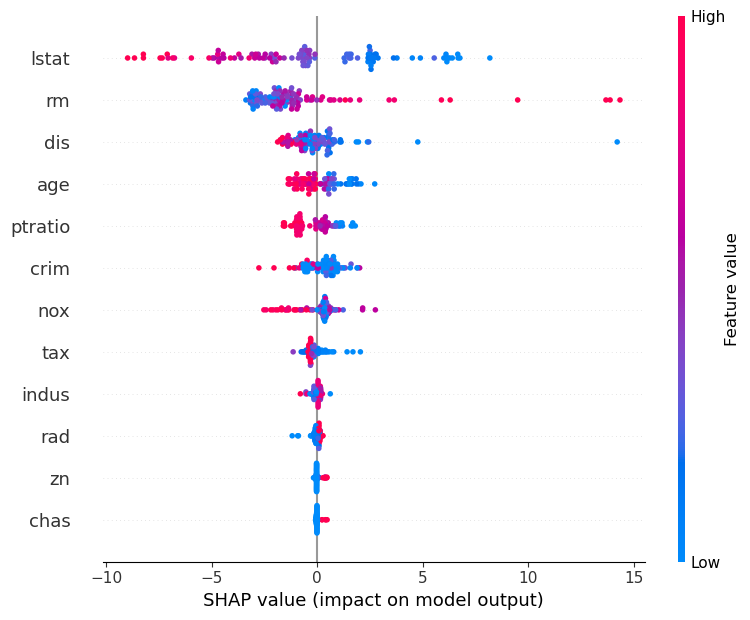

In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from ISLP import load_data

# Load the Boston dataset from ISLP
boston = load_data('Boston')
X = boston.drop(columns=['medv'])  # Features
y = boston['medv']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define parameter grid for cross-validation
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train XGBoost model with best parameters
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_model.fit(X_train, y_train)

# Make predictions
preds = best_model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, preds)
print(f' Mean Squared Error: {rmse:.4f}')

import xgboost as xgb
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from ISLP import load_data

# Load the Boston dataset from ISLP
boston = load_data('Boston')
X = boston.drop(columns=['medv'])  # Features
y = boston['medv']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define parameter grid for cross-validation
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train XGBoost model with best parameters
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_model.fit(X_train, y_train)

# Make predictions
preds = best_model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, preds)
print(f'Root Mean Squared Error: {rmse:.4f}')

# Compute SHAP values
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test)
